In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

The Dataset used here has been downloaded from: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images

In [2]:
image_set =  "/content//Datasets/lung_colon_image_set/lung_image_sets"

In [3]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 8, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 8, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [4]:
print(train_set.class_indices)

{'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}


In [5]:
print(train_set.classes)

[0 0 0 ... 2 2 2]


In [6]:
# Frequency of Classes

np.bincount(train_set.classes)

array([4000, 4000, 4000], dtype=int64)

In [7]:
IMAGE_SIZE = [224, 224]

In [8]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [10]:
flatten = Flatten()(resnet50.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [11]:
#creating a model
model = Model(inputs = resnet50.input, outputs = prediction )

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [13]:
# COMPILING THE MODEL

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [14]:
#executing the model
history = model.fit(train_set, validation_data = (validate_set), epochs = 10, verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 697s 463ms/step - loss: 0.7723 - accuracy: 0.9337 - val_loss: 0.1188 - val_accuracy: 0.9527
Epoch 2/10
1500/1500 [==============================] - 677s 451ms/step - loss: 0.1325 - accuracy: 0.9706 - val_loss: 0.0831 - val_accuracy: 0.9793
Epoch 3/10
1500/1500 [==============================] - 680s 453ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.1127 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 696s 464ms/step - loss: 0.0533 - accuracy: 0.9868 - val_loss: 0.0572 - val_accuracy: 0.9857
Epoch 5/10
1500/1500 [==============================] - 680s 453ms/step - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.0582 - val_accuracy: 0.9860
Epoch 6/10
1500/1500 [==============================] - 664s 443ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0772 - val_accuracy: 0.9857
Epoch 7/10
1500/1500 [==============================] - 673s 448ms/step - loss: 0.0563 - accuracy: 0.9908 - val_

In [15]:
def plot_result(history, label):
    plt.plot(history[label], 'blue', label='training '+label)
    plt.plot(history['val_'+label], 'orange',label='testing '+label)
    plt.title("Training vs Testing {}".format(label))
    plt.xlabel("epochs")
    plt.ylabel(label)
    plt.legend()
    plt.show()

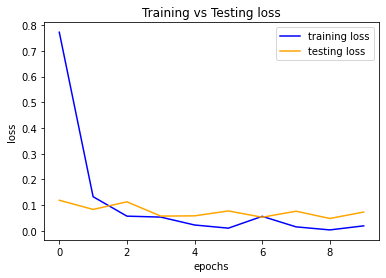

In [16]:
plot_result(history.history, label = 'loss')

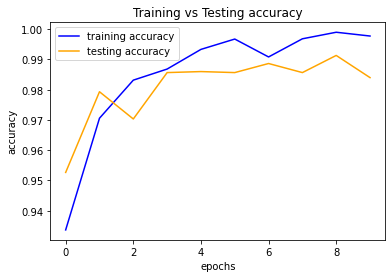

In [17]:
plot_result(history.history, label='accuracy')

In [18]:
# CHECKING THE CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(validate_set)
y_pred = np.argmax(Y_pred, axis=1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_pred,validate_set.classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_pred, validate_set.classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_pred, validate_set.classes, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_pred, validate_set.classes, average='weighted')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_pred, validate_set.classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_pred, validate_set.classes, multi_class="ovr", average='weighted')
#print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_pred, validate_set.classes)
print(matrix)

print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

Accuracy: 0.984000
Precision: 0.984481
Recall: 0.984000
F1 score: 0.984006
Cohens kappa: 0.976000
[[ 957    0    5]
 [   0 1000    0]
 [  43    0  995]]
Classification Report
              precision    recall  f1-score   support

         aca       0.99      0.96      0.98      1000
           n       1.00      1.00      1.00      1000
         scc       0.96      0.99      0.98      1000

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [19]:
result = model.evaluate(validate_set,batch_size=8)
print("test_loss, test accuracy",result)

375/375 [==============================] - 114s 305ms/step - loss: 0.0729 - accuracy: 0.9840
test_loss, test accuracy [0.0729033574461937, 0.984000027179718]


## Predictions

In [20]:
classes = {0 : 'Lung Adenocarcinoma',
           1: 'lung n',
           2 : 'Lung Squamous Cell Carcinoma'}

In [21]:
def predict_cancer(img):
    img = Image.open(img)
    img = img.resize((224, 224))
    img = np.array(img).reshape(-1, 224, 224, 3)
    
    predict_img = model.predict(img)
    predict_img = np.argmax(predict_img, axis=1)
    
    if predict_img == 0 or predict_img == 2:
        print("It is Malignant Tissue of type {}".format(classes[predict_img[0]]))
    else:
        print("Non-Cancerous Tissue")
        

In [26]:
predict_cancer('/content/Datasets/lung_colon_image_set/lung_image_sets/lung_n/lungn21.jpeg')

Non-Cancerous Tissue


In [23]:
# Save the Model Weights
model.save_weights('_model2_.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('_model2_.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.


In this project, deep learning techniques were implemented for detecting the presence of cancer. The ResNet-50 model was presented to tackle the classification challenge. The developed approach correctly categorizes lung cancer histopathology images as benign, adenocarcinoma, or squamous cell carcinoma. For future work, segmentation of images can be done for better analysis of cancer cells.